Introduction:

Solving this assignment will give you an idea about how real business problems are solved using EDA. In this case study, apart from applying the techniques you have learnt in EDA, you will also develop a basic understanding of risk analytics in banking and financial services and understand how data is used to minimise the risk of losing money while lending to customers.

You work for a consumer finance company which specialises in lending various types of loans to urban customers. When the company receives a loan application, the company has to make a decision for loan approval based on the applicant’s profile. Two types of risks are associated with the bank’s decision:

If the applicant is likely to repay the loan, then not approving the loan results in a loss of business to the company

If the applicant is not likely to repay the loan, i.e. he/she is likely to default, then approving the loan may lead to a financial loss for the company

1.Loan accepted: If the company approves the loan, there are 3 possible scenarios described below:

a)Fully paid: Applicant has fully paid the loan (the principal and the interest rate)

b)Current: Applicant is in the process of paying the instalments, i.e. the tenure of the loan is not yet completed. These candidates are not labelled as 'defaulted'.

c)Charged-off: Applicant has not paid the instalments in due time for a long period of time, i.e. he/she has defaulted on the loan 

2)Loan rejected: The company had rejected the loan (because the candidate does not meet their requirements etc.). Since the loan was rejected, there is no transactional history of those applicants with the company and so this data is not available with the company (and thus in this dataset)
 

# To Analyse Data Divided into 4 parts:
1)Data understanding
2)Data cleaning (cleaning missing values, removing redundant columns etc.)
3)Data Analysis
4)Recommendations

In [57]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

In [61]:
#Reading data from csv file using pandas
loans = pd.read_csv("loan.csv",low_memory=True)
loans

C:\Users\DELL\AppData\Local\Temp\ipykernel_17592\259845894.py:2: DtypeWarning: Columns (47) have mixed types. Specify dtype option on import or set low_memory=False.
  loans = pd.read_csv("loan.csv",low_memory=True)


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39712,92187,92174,2500,2500,1075.0,36 months,8.07%,78.42,A,A4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39713,90665,90607,8500,8500,875.0,36 months,10.28%,275.38,C,C1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39714,90395,90390,5000,5000,1325.0,36 months,8.07%,156.84,A,A4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39715,90376,89243,5000,5000,650.0,36 months,7.43%,155.38,A,A2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# 1.Data Understanding

In [63]:
loans.head()


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [68]:
loans.shape

(39717, 111)

In [69]:
#dataframe information
loans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB


In [70]:
loans.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       ...
       'num_tl_90g_dpd_24m', 'num_tl_op_past_12m', 'pct_tl_nvr_dlq',
       'percent_bc_gt_75', 'pub_rec_bankruptcies', 'tax_liens',
       'tot_hi_cred_lim', 'total_bal_ex_mort', 'total_bc_limit',
       'total_il_high_credit_limit'],
      dtype='object', length=111)

# 2.Data Cleaning

In [9]:
#checking empty columns in %age
round((100*loans.isnull().sum())/len(loans.index))

id                              0.0
member_id                       0.0
loan_amnt                       0.0
funded_amnt                     0.0
funded_amnt_inv                 0.0
                              ...  
tax_liens                       0.0
tot_hi_cred_lim               100.0
total_bal_ex_mort             100.0
total_bc_limit                100.0
total_il_high_credit_limit    100.0
Length: 111, dtype: float64

In [10]:
#drop all the columns which contains 100% Nan Data
loans.dropna(axis=1,how='all',inplace=True)
round((100*loans.isnull().sum())/len(loans.index))

id                             0.0
member_id                      0.0
loan_amnt                      0.0
funded_amnt                    0.0
funded_amnt_inv                0.0
term                           0.0
int_rate                       0.0
installment                    0.0
grade                          0.0
sub_grade                      0.0
emp_title                      6.0
emp_length                     3.0
home_ownership                 0.0
annual_inc                     0.0
verification_status            0.0
issue_d                        0.0
loan_status                    0.0
pymnt_plan                     0.0
url                            0.0
desc                          33.0
purpose                        0.0
title                          0.0
zip_code                       0.0
addr_state                     0.0
dti                            0.0
delinq_2yrs                    0.0
earliest_cr_line               0.0
inq_last_6mths                 0.0
mths_since_last_deli

In [13]:
#drop columns in which nan data is very high in percentage
loans.drop(labels=['next_pymnt_d','mths_since_last_record','mths_since_last_delinq'],axis=1,inplace=True)
loans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 54 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          39717 non-null  int64  
 1   member_id                   39717 non-null  int64  
 2   loan_amnt                   39717 non-null  int64  
 3   funded_amnt                 39717 non-null  int64  
 4   funded_amnt_inv             39717 non-null  float64
 5   term                        39717 non-null  object 
 6   int_rate                    39717 non-null  object 
 7   installment                 39717 non-null  float64
 8   grade                       39717 non-null  object 
 9   sub_grade                   39717 non-null  object 
 10  emp_title                   37258 non-null  object 
 11  emp_length                  38642 non-null  object 
 12  home_ownership              39717 non-null  object 
 13  annual_inc                  397

In [14]:
loans.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,171.62,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,119.66,Sep-13,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,649.91,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,357.48,Apr-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,67.79,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0


In [15]:
#check rows which contains 100% empty data
round((100*loans.isnull().sum(axis=1))/len(loans.index))

0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
39712    0.0
39713    0.0
39714    0.0
39715    0.0
39716    0.0
Length: 39717, dtype: float64

In [16]:
#check the unique target values
loans['loan_status'].unique()

array(['Fully Paid', 'Charged Off', 'Current'], dtype=object)

In [18]:
#drop Current loan status from the rows becuase it will not provide any past data it it still in running mode
loan_status_list = ['Fully Paid','Charged Off']
loans=loans[loans['loan_status'].isin(loan_status_list)]
loans.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,171.62,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,119.66,Sep-13,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,649.91,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,357.48,Apr-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
5,1075269,1311441,5000,5000,5000.0,36 months,7.90%,156.46,A,A4,...,161.03,Jan-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0


In [19]:
#convert loan status data into numerical data i.e. Fully Paid = 0 and Charged Off = 1
loans['loan_status']=loans['loan_status'].map({'Fully Paid':0,'Charged Off':1})
loans.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,171.62,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,119.66,Sep-13,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,649.91,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,357.48,Apr-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
5,1075269,1311441,5000,5000,5000.0,36 months,7.90%,156.46,A,A4,...,161.03,Jan-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0


In [21]:
#Extract necessary columns which might impact the target columns i.e. Feature selection
loans=loans.loc[:,('loan_amnt','term','int_rate','grade','emp_length',
              'home_ownership','annual_inc','issue_d','loan_status','purpose',
             'addr_state','dti')]
loans.head()

,loan_amnt,term,int_rate,grade,emp_length,home_ownership,annual_inc,issue_d,loan_status,purpose,addr_state,dti
0,5000,36 months,10.65%,B,10+ years,RENT,24000.0,Dec-11,0,credit_card,AZ,27.65
1,2500,60 months,15.27%,C,< 1 year,RENT,30000.0,Dec-11,1,car,GA,1.00
2,2400,36 months,15.96%,C,10+ years,RENT,12252.0,Dec-11,0,small_business,IL,8.72
3,10000,36 months,13.49%,C,10+ years,RENT,49200.0,Dec-11,0,other,CA,20.00
5,5000,36 months,7.90%,A,3 years,RENT,36000.0,Dec-11,0,wedding,AZ,11.20


In [22]:
#create new column from the existing column
loans['year'] = loans['issue_d'].apply(lambda x:x.split('-')[1])
loans.head()

,loan_amnt,term,int_rate,grade,emp_length,home_ownership,annual_inc,issue_d,loan_status,purpose,addr_state,dti,year
0,5000,36 months,10.65%,B,10+ years,RENT,24000.0,Dec-11,0,credit_card,AZ,27.65,11
1,2500,60 months,15.27%,C,< 1 year,RENT,30000.0,Dec-11,1,car,GA,1.00,11
2,2400,36 months,15.96%,C,10+ years,RENT,12252.0,Dec-11,0,small_business,IL,8.72,11
3,10000,36 months,13.49%,C,10+ years,RENT,49200.0,Dec-11,0,other,CA,20.00,11
5,5000,36 months,7.90%,A,3 years,RENT,36000.0,Dec-11,0,wedding,AZ,11.20,11


In [23]:
#convert the data type from string to int and check the type
loans['year']=loans['year'].astype(np.int)
type(loans['year'][0])

C:\Users\DELL\AppData\Local\Temp\ipykernel_17592\482041907.py:2: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  loans['year']=loans['year'].astype(np.int)


numpy.int32

# 3.Data Visualizing

# A)Univariate Analysis

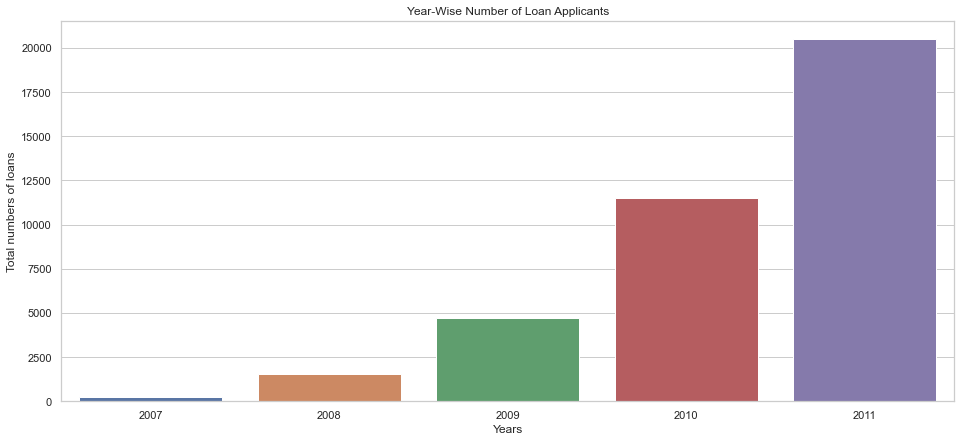

In [25]:
#draw a countplot to show the year wise increasing amount of loans in lending clubs 
plt.figure(figsize=(16,7))
sb.set(style="whitegrid")
ax=sb.countplot(x='year',data=loans)
years = ['2007','2008','2009','2010','2011']
xpos=np.arange(len(years))
ax.set(xlabel='Years', ylabel='Total numbers of loans',title='Year-Wise Number of Loan Applicants')
plt.xticks(xpos,years)
plt.show()

In this univariate analysis , Substantial growth between 2007-2011 in the number of loan applicants

In [26]:
#change the type of int_rate column from string to float
loans['int_rate']=loans['int_rate'].str.replace('%','')
loans['int_rate']=loans['int_rate'].astype(np.float)
type(loans['int_rate'][0])

C:\Users\DELL\AppData\Local\Temp\ipykernel_17592\4172850773.py:3: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  loans['int_rate']=loans['int_rate'].astype(np.float)


numpy.float64

In [27]:

#create new column from the existing column
loans['month'] = loans['issue_d'].apply(lambda x:x.split('-')[0])
loans.head()

,loan_amnt,term,int_rate,grade,emp_length,home_ownership,annual_inc,issue_d,loan_status,purpose,addr_state,dti,year,month
0,5000,36 months,10.65,B,10+ years,RENT,24000.0,Dec-11,0,credit_card,AZ,27.65,11,Dec
1,2500,60 months,15.27,C,< 1 year,RENT,30000.0,Dec-11,1,car,GA,1.00,11,Dec
2,2400,36 months,15.96,C,10+ years,RENT,12252.0,Dec-11,0,small_business,IL,8.72,11,Dec
3,10000,36 months,13.49,C,10+ years,RENT,49200.0,Dec-11,0,other,CA,20.00,11,Dec
5,5000,36 months,7.90,A,3 years,RENT,36000.0,Dec-11,0,wedding,AZ,11.20,11,Dec


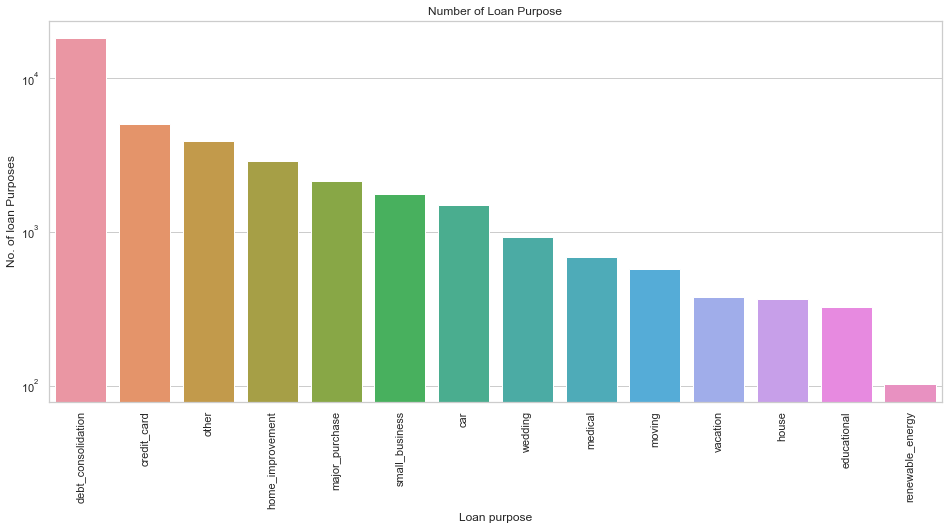

In [28]:
#Count plot to show the different loan purpose from the lending clubs
plt.figure(figsize=(16,7))
ax = sb.countplot(x='purpose',data=loans,order=loans['purpose'].value_counts().index)
ax.set(xlabel='Loan purpose', ylabel='No. of loan Purposes',title='Number of Loan Purpose')
plt.xticks(rotation=90)
plt.yscale('log')
plt.show()

The five major purposes of Loan applications are - ‘debt_consolidation’ , ‘credit_card’ , ‘other’ , ‘home_improvement’ & ‘major_purchase’

debt_consolidation’ is the highest loan purpose

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


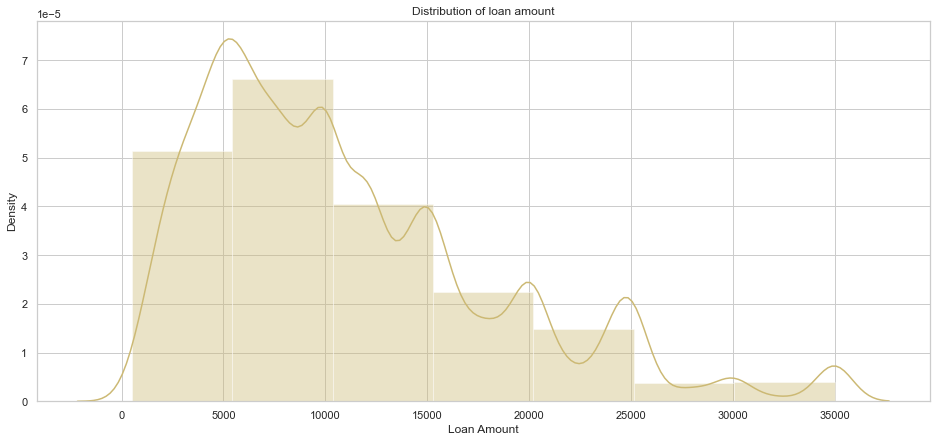

In [30]:
#loan amount distribution 
plt.figure(figsize=(16,7))
ax=sb.distplot(loans['loan_amnt'],bins=7,color='y')
ax.set(xlabel='Loan Amount',title='Distribution of loan amount')
plt.show()

The distribution of loan amount i.e the amount of loan applied can be visualized from the above plot . It has been observed that the maximum loan range amount is between 5000-10000

In [31]:
#create a separate dataframe of defaulters
defaulters_df=loans.loc[loans['loan_status']==1]
defaulters_df.head()

,loan_amnt,term,int_rate,grade,emp_length,home_ownership,annual_inc,issue_d,loan_status,purpose,addr_state,dti,year,month
1,2500,60 months,15.27,C,< 1 year,RENT,30000.0,Dec-11,1,car,GA,1.00,11,Dec
8,5600,60 months,21.28,F,4 years,OWN,40000.0,Dec-11,1,small_business,CA,5.55,11,Dec
9,5375,60 months,12.69,B,< 1 year,RENT,15000.0,Dec-11,1,other,TX,18.08,11,Dec
12,9000,36 months,13.49,C,< 1 year,RENT,30000.0,Dec-11,1,debt_consolidation,VA,10.08,11,Dec
14,10000,36 months,10.65,B,3 years,RENT,100000.0,Dec-11,1,other,CA,7.06,11,Dec


In [32]:
#calculate the percentage of loan defaulters according to grade
grade_df=pd.DataFrame(data=round((100*defaulters_df['grade'].value_counts())/loans['grade'].value_counts(),2))
grade_df.rename(columns={'grade':'defaulter_perc'},inplace=True)
grade_df

,defaulter_perc
A,5.99
B,12.21
C,17.19
D,21.99
E,26.85
F,32.68
G,33.78


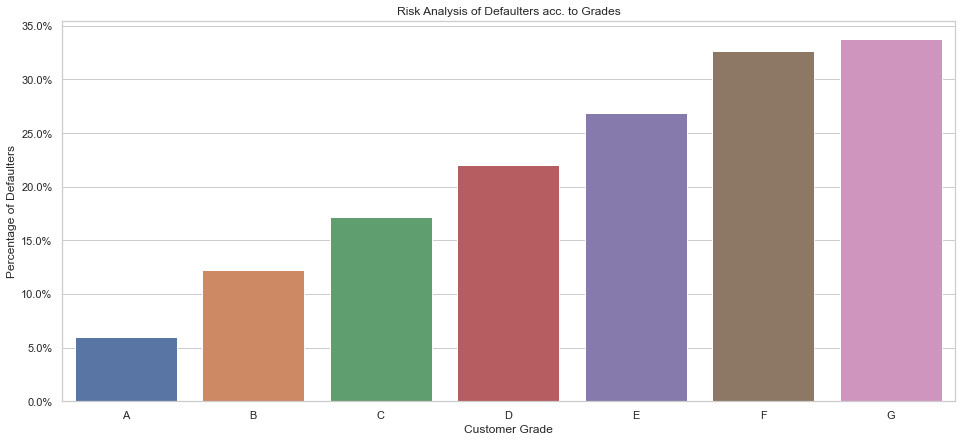

In [33]:
import matplotlib.ticker as mtick
plt.figure(figsize=(16,7))
ax=sb.barplot(x=grade_df.index,y='defaulter_perc',data=grade_df)
ax.set(xlabel='Customer Grade', ylabel='Percentage of Defaulters',title='Risk Analysis of Defaulters acc. to Grades')
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
plt.show()

The percentage of Defaulters is the highest in Grade G group

In [34]:
#calculate the percentage of loan defaulters according to loan purpose
purpose_df=pd.DataFrame(data=round((100*defaulters_df['purpose'].value_counts())/loans['purpose'].value_counts(),2))
purpose_df.rename(columns={'purpose':'defaulter_perc'},inplace=True)
purpose_df.sort_values(by='defaulter_perc',ascending=False,inplace=True)
purpose_df

,defaulter_perc
small_business,27.08
renewable_energy,18.63
educational,17.23
other,16.38
house,16.08
moving,15.97
medical,15.57
debt_consolidation,15.33
vacation,14.13
home_improvement,12.07


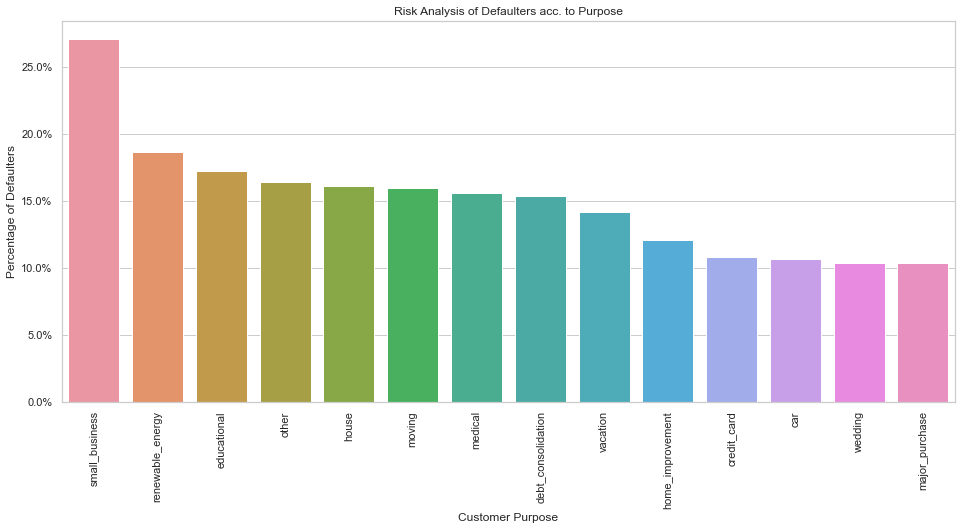

In [35]:
import matplotlib.ticker as mtick
plt.figure(figsize=(16,7))
ax=sb.barplot(x=purpose_df.index,y='defaulter_perc',data=purpose_df)
ax.set(xlabel='Customer Purpose', ylabel='Percentage of Defaulters',title='Risk Analysis of Defaulters acc. to Purpose')
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
plt.xticks(rotation=90)
plt.show()


The percentage of risk of Defaulters is the largest in the Loan Purpose – ‘small_business’ , followed by ‘renewable_energy’ , ‘educational’ and so on.

In [37]:
#calculate the percentage of loan defaulters according to Employee experience
emp_df=pd.DataFrame(data=round((100*defaulters_df['emp_length'].value_counts())/loans['emp_length'].value_counts(),2))
emp_df.rename(columns={'emp_length':'defaulter_perc'},inplace=True)
emp_df.sort_values(by='defaulter_perc',ascending=False,inplace=True)
emp_df

,defaulter_perc
10+ years,15.68
7 years,15.37
1 year,14.39
5 years,14.34
< 1 year,14.17
6 years,14.16
8 years,14.15
3 years,13.83
4 years,13.82
2 years,13.21


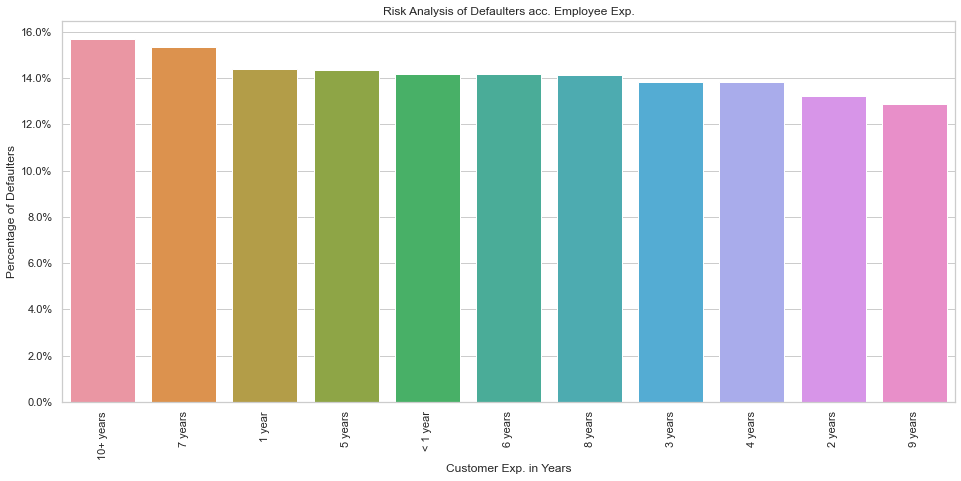

In [38]:
import matplotlib.ticker as mtick
plt.figure(figsize=(16,7))
ax=sb.barplot(x=emp_df.index,y='defaulter_perc',data=emp_df)
ax.set(xlabel='Customer Exp. in Years', ylabel='Percentage of Defaulters',title='Risk Analysis of Defaulters acc. Employee Exp.')
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
plt.xticks(rotation=90)
plt.show()

The percentage of risk of Defaulters is maximum for customer experience - 10+ years & minimum for 9 year’s experience . Rest year of experience is in between

In [40]:
#calculate the percentage of loan defaulters according to home onwership
home_df=pd.DataFrame(data=round((100*defaulters_df['home_ownership'].value_counts())/loans['home_ownership'].value_counts(),2))
home_df.rename(columns={'home_ownership':'defaulter_perc'},inplace=True)
home_df.sort_values(by='defaulter_perc',ascending=False,inplace=True)
home_df.dropna(inplace=True)
home_df

,defaulter_perc
OTHER,18.37
RENT,15.36
OWN,14.89
MORTGAGE,13.67


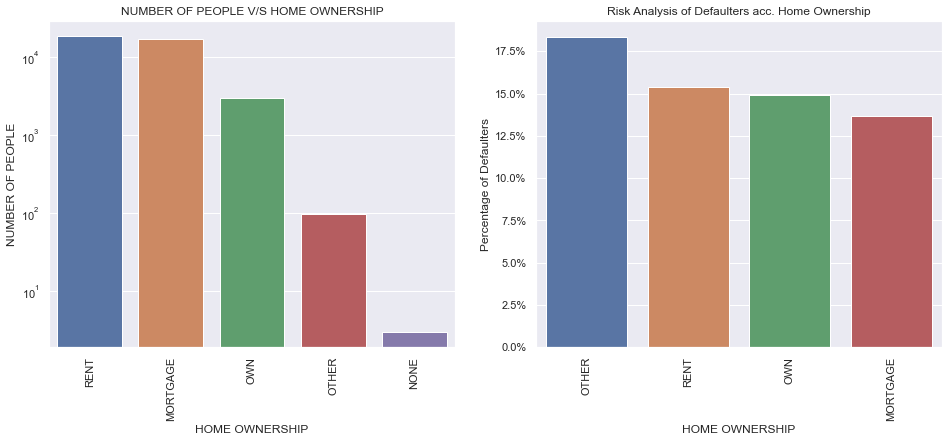

In [43]:
sb.set(style="darkgrid")
plt.figure(figsize=(16,6))
plt.subplot(1, 2, 1)
ax = sb.countplot(x='home_ownership',data=loans,order=loans['home_ownership'].value_counts().index)
ax.set(xlabel='HOME OWNERSHIP', ylabel='NUMBER OF PEOPLE',title='NUMBER OF PEOPLE V/S HOME OWNERSHIP')
plt.xticks(rotation=90)
plt.yscale('log')
plt.subplot(1, 2, 2)
#plt.pie(home_df['defaulter_perc'], labels = home_df.index,autopct='%.2f%%')
ax=sb.barplot(x=home_df.index,y='defaulter_perc',data=home_df)
ax.set(xlabel='HOME OWNERSHIP', ylabel='Percentage of Defaulters',title='Risk Analysis of Defaulters acc. Home Ownership')
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
plt.xticks(rotation=90)
plt.show()

1. The number of people who have home ownership - “Rent”
2. The percentage of defaulter under home ownership is “Other” followed by “Rent” and “Own” and “Mortgage”

# B)Bivariate Analysis

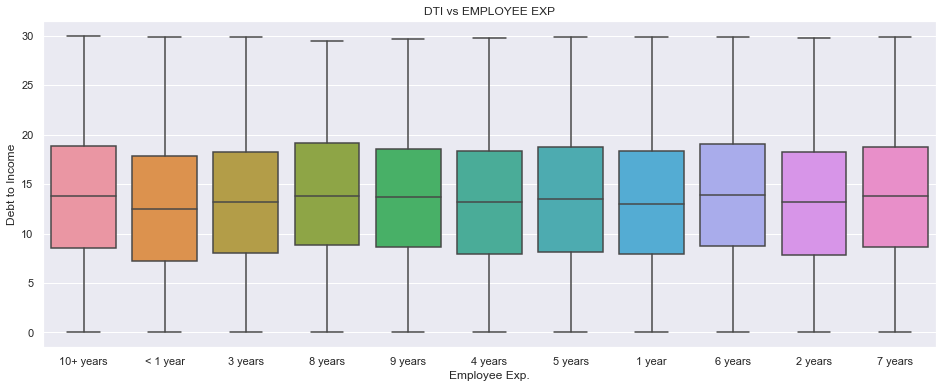

In [45]:
plt.figure(figsize=(16,6))
ax=sb.boxplot(x='emp_length',y='dti',data=loans)
ax.set(xlabel='Employee Exp.', ylabel='Debt to Income',title='DTI vs EMPLOYEE EXP')
plt.show()

By doing bivariate analysis it has been observed that 10+ years of employee exp. Is having debt to income in maximum range apart from that rest year of employee exp. are more or less in same range.

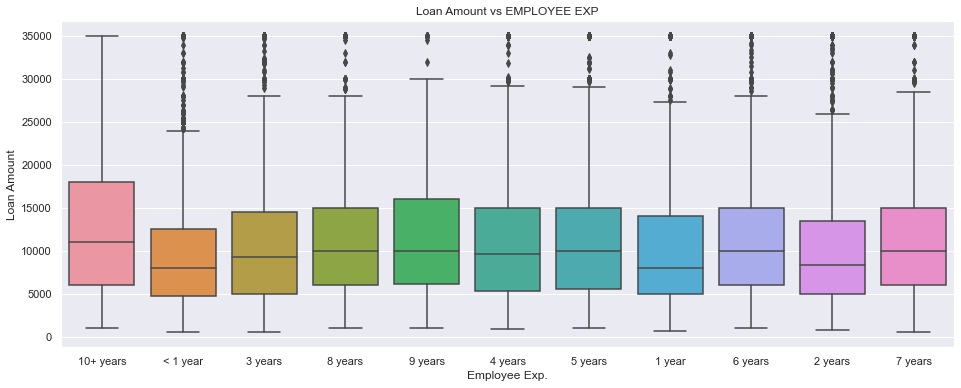

In [47]:
plt.figure(figsize=(16,6))
ax=sb.boxplot(x='emp_length',y='loan_amnt',data=loans)
ax.set(xlabel='Employee Exp.', ylabel='Loan Amount',title='Loan Amount vs EMPLOYEE EXP')
plt.show()

By doing bivariate analysis it has been observed that the employee exp. With 10+ years is taking more amount of loan and those who are less than 1 year is taken less amount of loan.

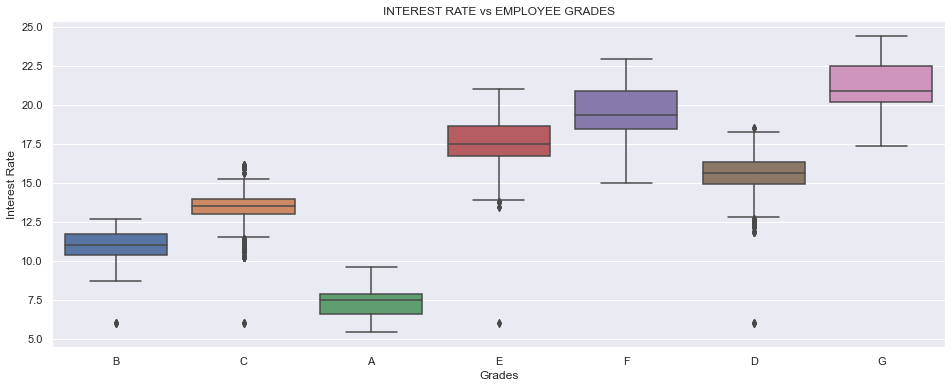

In [48]:
plt.figure(figsize=(16,6))
ax=sb.boxplot(x='grade',y='int_rate',data=loans)
ax.set(xlabel='Grades', ylabel='Interest Rate',title='INTEREST RATE vs EMPLOYEE GRADES')
plt.show()


From the above plot it has been visualize that based on grade interest rate is going higher – “A” is having minimum interest rate, whereas “B” is having higher interest rate.

In [49]:
grade_group = loans.groupby('grade')
grade_group['int_rate'].median()

grade
A     7.49
B    10.99
C    13.49
D    15.62
E    17.51
F    19.36
G    20.90
Name: int_rate, dtype: float64

In [51]:
emp_group = loans.groupby('emp_length')
emp_group['loan_amnt'].median()

emp_length
1 year        8000.0
10+ years    11000.0
2 years       8400.0
3 years       9225.0
4 years       9600.0
5 years      10000.0
6 years      10000.0
7 years      10000.0
8 years      10000.0
9 years      10000.0
< 1 year      8000.0
Name: loan_amnt, dtype: float64

In [52]:
#calculate the percentage of loan defaulters according to address of a state
state_df=pd.DataFrame(data=round((100*defaulters_df['addr_state'].value_counts())/loans['addr_state'].value_counts(),2))
state_df.rename(columns={'addr_state':'defaulter_perc'},inplace=True)
state_df.sort_values(by='defaulter_perc',ascending=False,inplace=True)
state_df=state_df.head(10)
state_df

,defaulter_perc
NE,60.00
NV,22.55
SD,19.35
AK,19.23
FL,18.12
MO,17.01
HI,16.87
ID,16.67
NM,16.39
OR,16.32


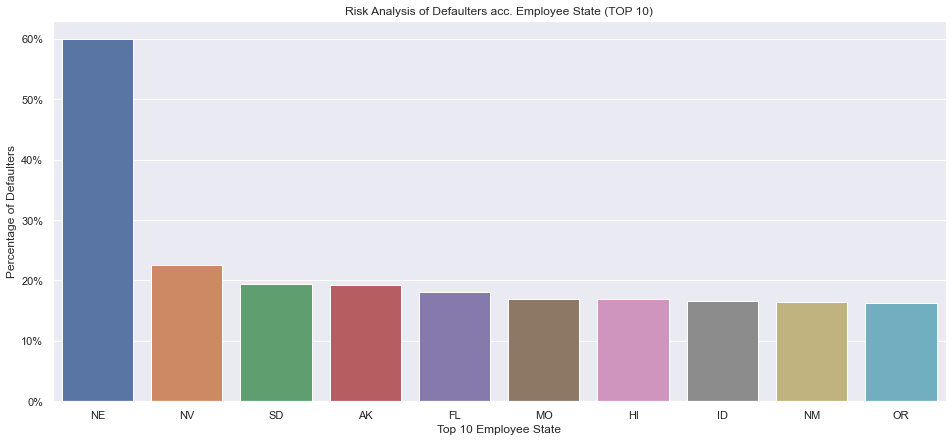

In [53]:
import matplotlib.ticker as mtick
plt.figure(figsize=(16,7))
ax=sb.barplot(x=state_df.index,y='defaulter_perc',data=state_df)
ax.set(xlabel='Top 10 Employee State', ylabel='Percentage of Defaulters',title='Risk Analysis of Defaulters acc. Employee State (TOP 10)')
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
plt.show()

The percentage of Defaulters is maximum from NE (address) which is 60%

In [55]:
#calculate the percentage of loan defaulters according to term
term_df=pd.DataFrame(data=round((100*defaulters_df['term'].value_counts())/loans['term'].value_counts(),2))
term_df.rename(columns={'term':'defaulter_perc'},inplace=True)
term_df.sort_values(by='defaulter_perc',ascending=False,inplace=True)
term_df

,defaulter_perc
60 months,25.31
36 months,11.09


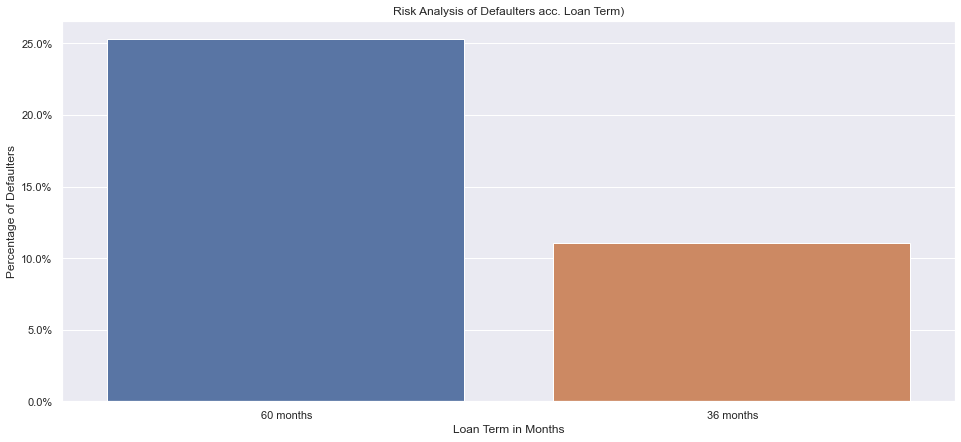

In [56]:
import matplotlib.ticker as mtick
plt.figure(figsize=(16,7))
ax=sb.barplot(x=term_df.index,y='defaulter_perc',data=term_df)
ax.set(xlabel='Loan Term in Months', ylabel='Percentage of Defaulters',title='Risk Analysis of Defaulters acc. Loan Term)')
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
plt.show()